## Support Vector Machines (SVM)
The following code downloads and fits Support Vector Machine on the LIAR dataset for fake news detection. We model the fake news detection problem as a binary classification problem wherer "true" and "mostly-true" classes are put in class '1' and the remaining classes are put in class '0'.

Support Vector Machines (SVMs) are a type of supervised machine learning algorithm primarily used for classification tasks. At their core, SVMs aim to find a hyperplane in an N-dimensional space (N being the number of features) that distinctly classifies data points. To enhance performance, especially in non-linear situations, SVMs employ kernel functions, like polynomial or radial basis function (RBF), to transform data into a higher dimensional space where it becomes easier to separate. A key feature of SVMs is their focus on determining the best margin that separates classes, which involves identifying and leveraging the most critical data points, known as support vectors. This approach gives SVMs a distinctive advantage in achieving high accuracy with less computational resources, making them effective in handling complex datasets with clear margin of separation.

# Data Preparation for Machine Learning

- **Library Import**: Importing the pandas library for data manipulation.

- **Data Loading**:
  - Train, test, and validation datasets are loaded from specified file paths.
  - These datasets are in a tab-separated format without header rows.

- **Column Naming**:
  - Assigning meaningful column names to the datasets. These names include identifiers and various attributes related to the statements, such as the truthfulness label, speaker information, and counts of previous statement veracity.

- **Data Preprocessing Function (`data_preprocessing`)**:
  - **Purpose**: To prepare the datasets for machine learning analysis.
  - **Label Transformation**: Converts the 'label' column into a binary 'label_to_predict' column. This is set to 1 for 'true' or 'mostly-true' statements and 0 otherwise, simplifying the classification task.
  - **Column Removal**: Drops several columns deemed unnecessary for the analysis, like the statement ID, original label, and various truth count columns.
  - **Missing Value Handling**: Removes rows with missing values to ensure data quality.

- **Applying Preprocessing**:
  - The preprocessing function is applied to the training, testing, and validation datasets, making them ready for use in machine learning models.

This process ensures that the datasets are cleaned, transformed, and standardized for effective machine learning model training and evaluation.


In [1]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/Foundations of Data Science/Project/Data/train.tsv', sep="\t", header=None)
test_data = pd.read_csv('/content/drive/MyDrive/Foundations of Data Science/Project/Data/test.tsv', sep="\t", header=None)
validation_data = pd.read_csv('/content/drive/MyDrive/Foundations of Data Science/Project/Data/valid.tsv', sep="\t", header=None)

column_names = ['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job_title',
                'state_info', 'party_affiliation', 'barely_true_count', 'false_count', 'half_true_count',
                'mostly_true_count', 'pants_on_fire_count', 'statement_context']

train_data.columns = column_names
validation_data.columns = column_names
test_data.columns = column_names

def data_preprocessing(data):
  data['label_to_predict']=[1 if x=="true" or x=="mostly-true" else 0 for x in data['label']]
  data = data.drop(labels=['ID', 'label', 'barely_true_count', 'false_count', 'half_true_count', 'mostly_true_count', 'pants_on_fire_count'], axis=1)
  data.dropna()
  return data
cleaned_train_data = data_preprocessing(train_data)
cleaned_test_data = data_preprocessing(test_data)
cleaned_val_data = data_preprocessing(validation_data)

Printing the training data to get a feel of the underlying data in hand.

In [ ]:
cleaned_train_data.head(3)

,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,statement_context,label_to_predict
0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer,0
1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.,0
2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,Denver,1


This code cell separates the features and the target variable for each of the training, testing, and validation datasets. It creates cleaned_X_* dataframes containing all columns except 'label_to_predict', which are the features, and cleaned_y_* series containing only the 'label_to_predict' column, which is the target variable. This separation is a standard practice in machine learning to prepare datasets for training and evaluating models.

In [ ]:
cleaned_X_train = cleaned_train_data.drop('label_to_predict', axis=1)
cleaned_y_train = cleaned_train_data['label_to_predict']

cleaned_X_test = cleaned_test_data.drop('label_to_predict', axis=1)
cleaned_y_test = cleaned_test_data['label_to_predict']

cleaned_X_val = cleaned_val_data.drop('label_to_predict', axis=1)
cleaned_y_val = cleaned_val_data['label_to_predict']

Printing X_train which will have all features other than `label_to_predict`.

In [ ]:
cleaned_X_train.head(5)

,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,statement_context
0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer
1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.
2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,Denver
3,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,a news release
4,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,an interview on CNN


Printing y_train which will have just the `label_to_predict`. This will have 1 for 'true' and 'mostly-true' and 0 for all other classes.

In [ ]:
cleaned_y_train.head(5)

0    0
1    0
2    1
3    0
4    0
Name: label_to_predict, dtype: int64

This code snippet creates a DataFrame that summarizes the distribution of the target variable cleaned_y_train. It uses value_counts() to count the occurrences of each unique value in the cleaned_y_train series, which represents the binary classification labels. The resulting DataFrame, y_train_desc_df, will have the unique label values as the index and their respective counts as a column, providing a clear understanding of the balance or imbalance between the two classes in the training dataset.

In [ ]:
y_train_desc_df = pd.DataFrame(cleaned_y_train.value_counts())
y_train_desc_df

,label_to_predict
0,6602
1,3638


In [ ]:
y_test_desc_df = pd.DataFrame(cleaned_y_test.value_counts())
y_test_desc_df

,label_to_predict
0,818
1,449


Printing X_test which will have just the `label_to_predict`. This will have 1 for 'true' and 'mostly-true' and 0 for all other classes.

In [ ]:
cleaned_X_test.head(5)

,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,statement_context
0,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,Radio interview
1,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,a news conference
2,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,comments on ABC's This Week.
3,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,a radio show
4,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,a web video


The command !pip install scikit-learn-intelex is used to install the scikit-learn-intelex package in a Python environment. This package is an extension of Scikit-learn, a popular machine learning library in Python. The scikit-learn-intelex package specifically aims to accelerate Scikit-learn machine learning algorithms through optimizations that allow them to run more efficiently on certain types of hardware, particularly Intel processors. By installing this package, you can potentially improve the performance and speed of standard Scikit-learn functions, especially when working with large datasets or complex machine learning tasks. This can be particularly useful in environments where computational efficiency is a priority.

In [ ]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 6.3 MB/s eta 0:00:00


# Feature Preprocessing for Machine Learning

- **Combine Datasets**:
  - Combines the feature sets of training and test datasets into a single DataFrame (`combined`).
  - This ensures that feature transformation is consistent across both datasets.

- **One-Hot Encoding**:
  - Applies one-hot encoding to the `combined` DataFrame using `pd.get_dummies()`.
  - This process converts categorical variables into a format suitable for SVM, creating new columns for each unique category.

- **Split the Datasets Back**:
  - Splits the one-hot encoded DataFrame back into training and test sets.
  - `encoded_X_train` is extracted by selecting the first `len(cleaned_X_train)` rows, ensuring it retains the same size and order as the original training set.
  - `encoded_X_test` is obtained by selecting the remaining rows, matching the original test set's size and order.

This approach ensures that categorical features are appropriately processed and consistent across both training and test datasets, a crucial step for effective model training and evaluation.


In [ ]:
# Combine your datasets
combined = pd.concat([cleaned_X_train, cleaned_X_test])

# One-hot encode the combined dataframe
combined_encoded = pd.get_dummies(combined)

# Split the datasets back
encoded_X_train = combined_encoded[:len(cleaned_X_train)]
encoded_X_test = combined_encoded[len(cleaned_X_train):]

In [ ]:
len(encoded_X_train)

10240

In [ ]:
len(encoded_X_test)

1267

# SVM Model Training and Evaluation

- **Sklearnex Patch**:
  - The code starts by applying a patch from `sklearnex` to the standard Scikit-learn library. `sklearnex` enhances Scikit-learn performance on Intel hardware.

- **Model Training**:
  - An SVM (Support Vector Machine) model is instantiated with a linear kernel using `SVC(kernel='linear')`.
  - The model is then trained (`fit`) on the `encoded_X_train` dataset along with the corresponding labels `cleaned_y_train`.
  - The data currently contains all the metadata information like 'subject', 'speaker', 'speaker_job_title' etc. This is crucial to note as we will run the SVM model without these extraneous columns in the subsequent parts of the notebook.

- **Model Evaluation**:
  - Predictions are made on the `encoded_X_test` dataset using the trained SVM model.
  - The `classification_report` from Scikit-learn is used to print a summary of key metrics (like precision, recall, f1-score) based on the test labels (`cleaned_y_test`) and the predicted labels (`y_pred`).

This block of code is crucial for understanding the performance of the SVM model in classifying the test data, but it's noted that it need not be run if the model is already saved.


In [ ]:
# Need not run this block of code, we have the model saved
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
svm_model = SVC(kernel='linear')
svm_model.fit(encoded_X_train, cleaned_y_train)

y_pred = svm_model.predict(encoded_X_test)
print(classification_report(cleaned_y_test, y_pred))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


              precision    recall  f1-score   support

           0       0.67      0.75      0.71       818
           1       0.41      0.32      0.36       449

    accuracy                           0.60      1267
   macro avg       0.54      0.54      0.53      1267
weighted avg       0.58      0.60      0.58      1267



In [ ]:
len(y_pred)

1267

In [ ]:
len(cleaned_y_test)

1267

# Saving the SVM Model

- **Importing `pickle`**:
  - The code begins by importing the `pickle` module, which is used for serializing and deserializing Python object structures.

- **Model Saving**:
  - A filename `svm_model_for_fake_news_detection.sav` is defined for saving the model.
  - The trained SVM model (`svm_model`) is then serialized and saved to a file using `pickle.dump`. The model is written in 'write-binary' (`'wb'`) mode.

This code block is responsible for persisting the trained SVM model to disk, allowing for its reuse without the need to retrain. It's important to note that this block is for initial model saving and should not be run repeatedly once the model is saved.

In [ ]:
# Do not run this block of code, this is to save the model initially
import pickle
filename = 'svm_model_for_fake_news_detection.sav'
pickle.dump(svm_model, open(filename, 'wb'))

# Loading and Evaluating the SVM Model

- **Importing Required Modules**:
  - The code imports the `pickle` module for model deserialization and functions from `sklearn.metrics` for model evaluation.

- **Model Loading**:
  - A pre-trained SVM model is loaded from a specified file path (`'/content/drive/MyDrive/Foundations of Data Science/Project/Data/svm_model_for_fake_news_detection.sav'`) using `pickle.load`. The model is opened in 'read-binary' (`'rb'`) mode.

- **Model Prediction and Evaluation**:
  - The loaded model is used to make predictions on the `encoded_X_test` dataset.
  - The `classification_report` function is then used to generate a detailed evaluation report. It compares the actual labels (`cleaned_y_test`) with the predicted labels (`y_pred`) and returns the report as a dictionary (`output_dict=True`).

This snippet is crucial for evaluating the performance of the pre-trained SVM model on the test data, providing insights into various metrics like precision, recall, and F1-score.


In [ ]:
import pickle
from sklearn.metrics import classification_report, confusion_matrix
loaded_model = pickle.load(open('/content/drive/MyDrive/Foundations of Data Science/Project/Data/svm_model_for_fake_news_detection.sav', 'rb'))
y_pred = loaded_model.predict(encoded_X_test)
report_dict = classification_report(cleaned_y_test, y_pred, output_dict=True)

This code cell prints the classification report in a tabular format for better visualization.

In [ ]:
report_df = pd.DataFrame(report_dict).transpose()

print(report_df)

              precision    recall  f1-score      support
0              0.667752  0.751834  0.707303   818.000000
1              0.413295  0.318486  0.359748   449.000000
accuracy       0.598264  0.598264  0.598264     0.598264
macro avg      0.540524  0.535160  0.533526  1267.000000
weighted avg   0.577578  0.598264  0.584136  1267.000000


This code cell uses the `accuracy_score` from the sklearn.metrics package to compute the accuracy of the model we trained.

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(cleaned_y_test, y_pred))

0.5982636148382005


# Generating a Confusion Matrix Visualization

- **Importing Visualization Libraries**:
  - The code imports `pyplot` from `matplotlib` and `seaborn` (aliased as `sn`) for creating visualizations.

- **Creating Confusion Matrix**:
  - A confusion matrix is computed using `confusion_matrix` from `sklearn.metrics`, comparing the actual labels (`cleaned_y_test`) and the predicted labels (`y_pred`).

- **Plotting with Seaborn**:
  - The `heatmap` function from Seaborn is used to create a heatmap of the confusion matrix.
  - The heatmap is annotated with the actual numbers (`fmt='d'` for decimal formatting) to provide a clear view of the model's performance in terms of true positives, true negatives, false positives, and false negatives.
  - The plot is labeled with 'Predicted' on the x-axis and 'Truth' on the y-axis to clarify the axes representing the predicted and actual values, respectively.

This visualization aids in understanding the performance of the classification model by providing a visual representation of how well the model is classifying the test data.


Text(50.722222222222214, 0.5, 'Truth')

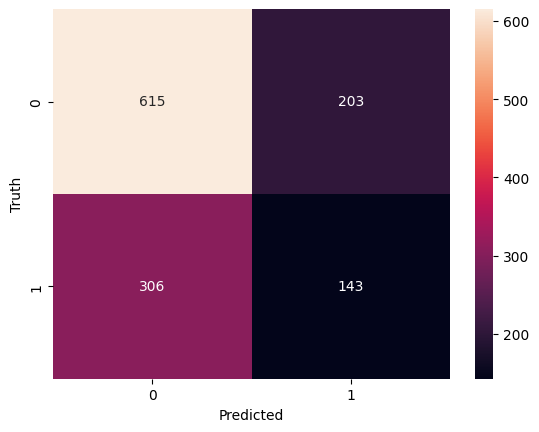

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

confusion_matrix = confusion_matrix(cleaned_y_test, y_pred)

sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Data Column Removal for Simplified Modeling

- **Removing Unwanted Columns**:
  - The code removes a set of specified columns from both the training set (`cleaned_X_train`) and the test set (`cleaned_X_test`).
  - The columns being removed are 'subject', 'speaker', 'speaker_job_title', 'state_info', 'party_affiliation', and 'statement_context'. These columns are presumably considered irrelevant or less informative for the specific modeling task at hand.

- **Updating Training and Test Sets**:
  - After the removal of these columns, the training and test datasets are updated to include only those features deemed relevant for model training and evaluation.

This step is crucial in feature selection, a process where extraneous or less important data is removed to streamline the model, potentially improving its performance and reducing overfitting.


In [ ]:
# Removing unwanted columns from the data
cleaned_X_train = cleaned_X_train.drop(['subject', 'speaker', 'speaker_job_title',
                                       'state_info', 'party_affiliation',	'statement_context'], axis=1)

cleaned_X_test = cleaned_X_test.drop(['subject', 'speaker', 'speaker_job_title',
                                       'state_info', 'party_affiliation',	'statement_context'], axis=1)

Printing the train and test data after removing irrelavant columns.

In [ ]:
cleaned_X_train.head(5)

,statement
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...


In [ ]:
cleaned_X_test.head(5)

,statement
0,Building a wall on the U.S.-Mexico border will...
1,Wisconsin is on pace to double the number of l...
2,Says John McCain has done nothing to help the ...
3,Suzanne Bonamici supports a plan that will cut...
4,When asked by a reporter whether hes at the ce...


This code cell performs one-hot encoding on the new train and test dataset with irrelavant columns removed. This uses the `pd.get_dummies` function as explained in the previous steps to convert the categorical columns to numerical data.

In [ ]:
# Combine your datasets
combined = pd.concat([cleaned_X_train, cleaned_X_test])

# One-hot encode the combined dataframe
combined_encoded = pd.get_dummies(combined)

# Split the datasets back
encoded_X_train = combined_encoded[:len(cleaned_X_train)]
encoded_X_test = combined_encoded[len(cleaned_X_train):]

We again fit the SVM on the new dataset and print the classification report for the same.

In [ ]:
# Need not run this code, we have the model saved
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
svm_model = SVC(kernel='linear')
svm_model.fit(encoded_X_train, cleaned_y_train)

y_pred = svm_model.predict(encoded_X_test)
print(classification_report(cleaned_y_test, y_pred))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


              precision    recall  f1-score   support

           0       0.65      1.00      0.79       818
           1       1.00      0.00      0.00       449

    accuracy                           0.65      1267
   macro avg       0.82      0.50      0.39      1267
weighted avg       0.77      0.65      0.51      1267



We use pickle to save the new model in another file so that we can load and use it in subsequent runs.

In [ ]:
# No need to run this cell, this is just to save the model
import pickle
filename = 'svm_model_for_fake_news_detection_improved_linear.sav'
pickle.dump(svm_model, open(filename, 'wb'))

We load the previously saved model and run it on the data to get predictions.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

loaded_model = pickle.load(open('/content/drive/MyDrive/Foundations of Data Science/Project/Data/svm_model_for_fake_news_detection_improved_linear.sav', 'rb'))
y_pred = loaded_model.predict(encoded_X_test)

We print the new confusion matrix. We observe a slight increase in performance.

Text(50.722222222222214, 0.5, 'Truth')

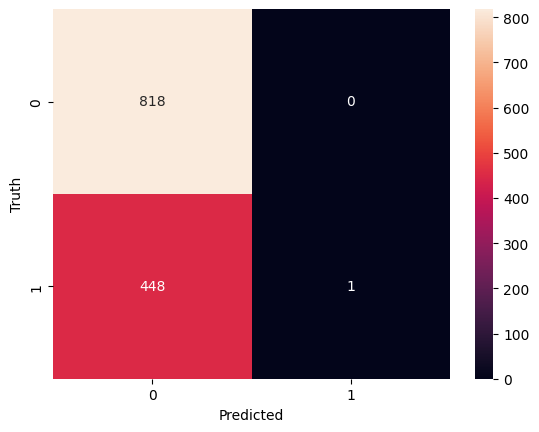

In [ ]:
confusion_matrix = confusion_matrix(cleaned_y_test, y_pred)
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(cleaned_y_test, y_pred))

0.6464088397790055


In [ ]:
report_dict = classification_report(cleaned_y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

print(report_df)

              precision    recall  f1-score      support
0              0.646130  1.000000  0.785029   818.000000
1              1.000000  0.002227  0.004444   449.000000
accuracy       0.646409  0.646409  0.646409     0.646409
macro avg      0.823065  0.501114  0.394737  1267.000000
weighted avg   0.771534  0.646409  0.508405  1267.000000
